# 08wk-1: (합성곱신경망) XXX

최규빈  
2025-01-01

<a href="https://colab.research.google.com/github/guebin/DL2025/blob/main/posts/05wk-2
    .ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

In [1]:
# {{<video https://youtu.be/playlist?list=PLQqh36zP38-yoX-Rtq9TPcvAawZfu6iZx&si=DD64EseytgR75zIz>}}

# 2. Imports

In [2]:
import torch
import torchvision
import PIL
import requests
import io
import matplotlib.pyplot as plt

# 3. `torch.einsum`

## A. transpose

## B. 행렬곱

## C. `img_plt` vs `img_pytorch`

# 4. 이미지 자료 처리

## A. 데이터

## B. 이미지 변환

# 5. AP Layer

## A. AP layer

## B. AP, Linear의 교환

# 6. CAM(Zhou et al. 2016)의 구현

ref: <https://arxiv.org/abs/1512.04150>

`-` 이 강의노트는 위의 논문의 내용을 재구성하였음.

## A. 0단계 – (X,y), (XX,yy)

## B. 1단계 – 이미지분류 잘하는 네트워크 선택 후 학습

## C. 2단계– Linear와 AP의 순서를 바꿈

**현재 네트워크**
$$\underset{(1,3,512,512)}{\boldsymbol x} \overset{stem}{\to} \left( \underset{(1,512,16,16)}{\tilde{\boldsymbol x}} \overset{ap}{\to} \underset{(1,512,1,1)}{{\boldsymbol \sharp}}\overset{flattn}{\to} \underset{(1,512)}{{\boldsymbol \sharp}}\overset{linr}{\to} \underset{(1,1)}{\hat{\boldsymbol y}}\right) = [[-5.5581]]$$

**바꾸고 싶은 네트워크**
$$\underset{(1,3,224,224)}{\boldsymbol x} \overset{stem}{\to} \left( \underset{(1,512,16,16)}{\tilde{\boldsymbol x}} \overset{\_linr}{\to} \underset{(1,2,16,16)}{{\boldsymbol \sharp}}\overset{ap}{\to} \underset{(1,1,1,1)}{{\boldsymbol \sharp}}\overset{flattn}{\to} \underset{(1,1)}{\hat{\boldsymbol y}}\right) = [[-5.5581]]$$

### $\star$ 잠깐 멈추고 생각 좀 해보자..

`-` 입력이미지

In [639]:
x

`-` 원래 계산방식을 그대로 적용하고 결과를 해석

In [640]:
linr(flattn(ap(stem(x))))

`-` 바뀐 계산방식을 적용해볼까?

In [641]:
flattn(ap(_linr(stem(x))))

`-` 좀더 파고들어서 분석해보자.

In [642]:
_linr(stem(x)).shape

In [643]:
_linr(stem(x)).long()

$$\underset{(1,2,16,16)}{{\boldsymbol \sharp}:={\bf WHY}}\overset{ap}{\to} \underset{(1,2,1,1)}{{\boldsymbol \sharp}}\overset{flatten}{\to} \underset{(1,1)}{\hat{\boldsymbol y}} = [[-5.5581]]$$

## D. 3단계 – WHY 시각화

`-` 시각화1

`-` 시각화2

`-` 시각화3 – 하니를 시각화해보자.

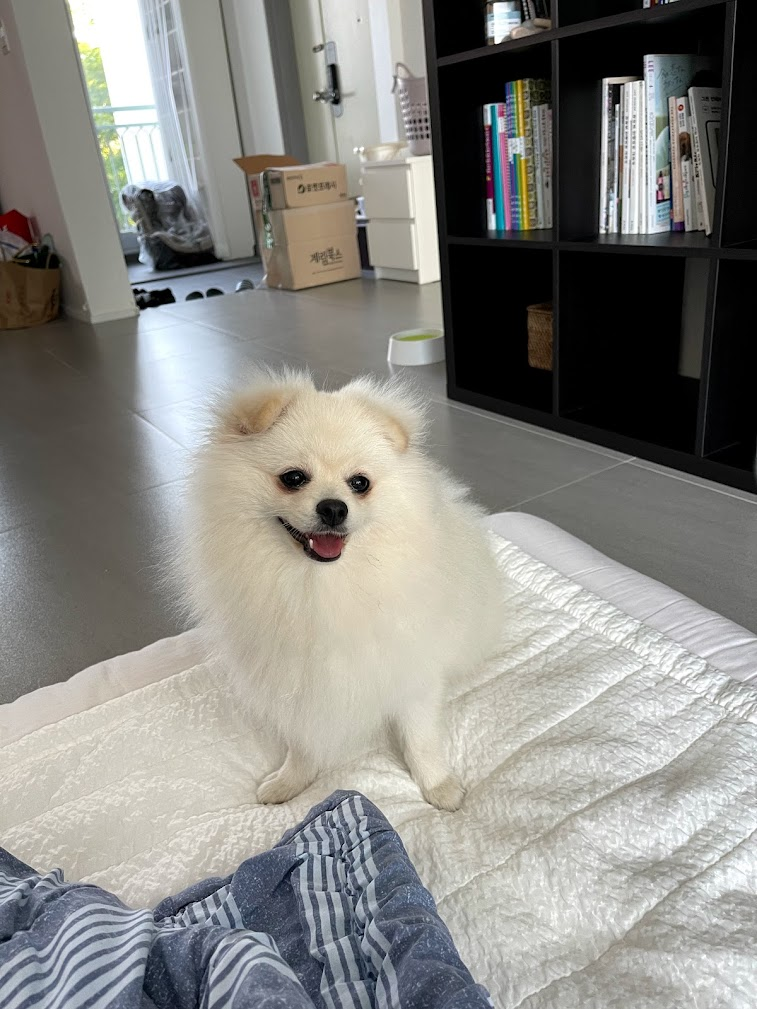

In [657]:
url = 'https://github.com/guebin/DL2024/blob/main/imgs/01wk-hani1.jpeg?raw=true'
hani_pil = PIL.Image.open(io.BytesIO(requests.get(url).content))
hani_pil

`-` 시각화4

Zhou, Bolei, Aditya Khosla, Agata Lapedriza, Aude Oliva, and Antonio
Torralba. 2016. “Learning Deep Features for Discriminative
Localization.” In *Proceedings of the IEEE Conference on Computer Vision
and Pattern Recognition*, 2921–29.